In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [22]:
probs_cols = [
        'mirai',
        'unk_bruteforcer',
        'unk_spammer',
        'shadowserver',
        'driftnet',
        'internetcensus',
        'censys',
        'rapid7',
        'onyphe',
        'netsystems',
        'shodan',
        'unk_exploiter',
        'securitytrails',
        'intrinsec',
        'unknown'
    ]
probs_cols.sort()

In [23]:
df = pd.read_csv("out_loo/k3/train/gcn_20211221_loo.csv")

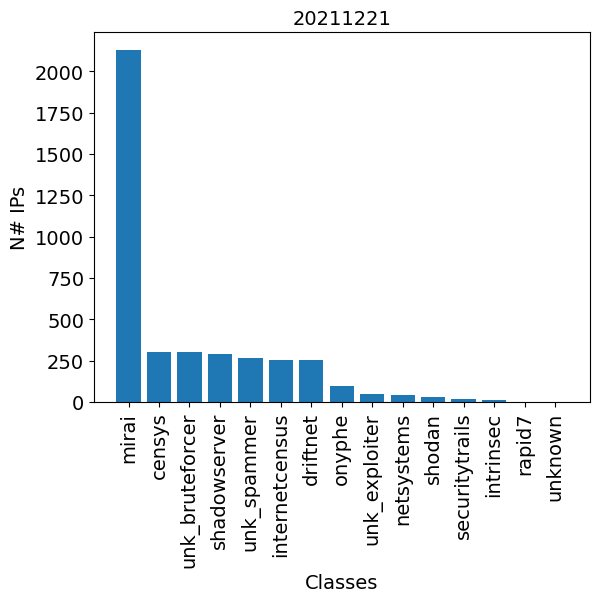

In [30]:
def plot_dist(df, day, probs_cols):
    
    counts = df[df.y_true != 'unknown'].y_true.value_counts()
    
    l = [ [col, counts[col]] if col in counts else [col, 0] for col in probs_cols ]
    l.sort(key=lambda x: x[1], reverse=True)
    
    x = [ t[0] for t in l ]
    y = [ t[1] for t in l ]
    
    plt.bar(x, y)
    
    plt.xlabel("Classes", fontsize=14)
    plt.ylabel("N# IPs", fontsize=14)
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)
    plt.title(day, fontsize=14)
    
plot_dist(df, "20211221", probs_cols)

In [9]:
days = sorted([ f.split('/')[-1].split('_')[-2] for f in glob(f"stacking_predictions/out/k3/train/idarkvec*_fold00.csv") ])

In [12]:
len(days)

11

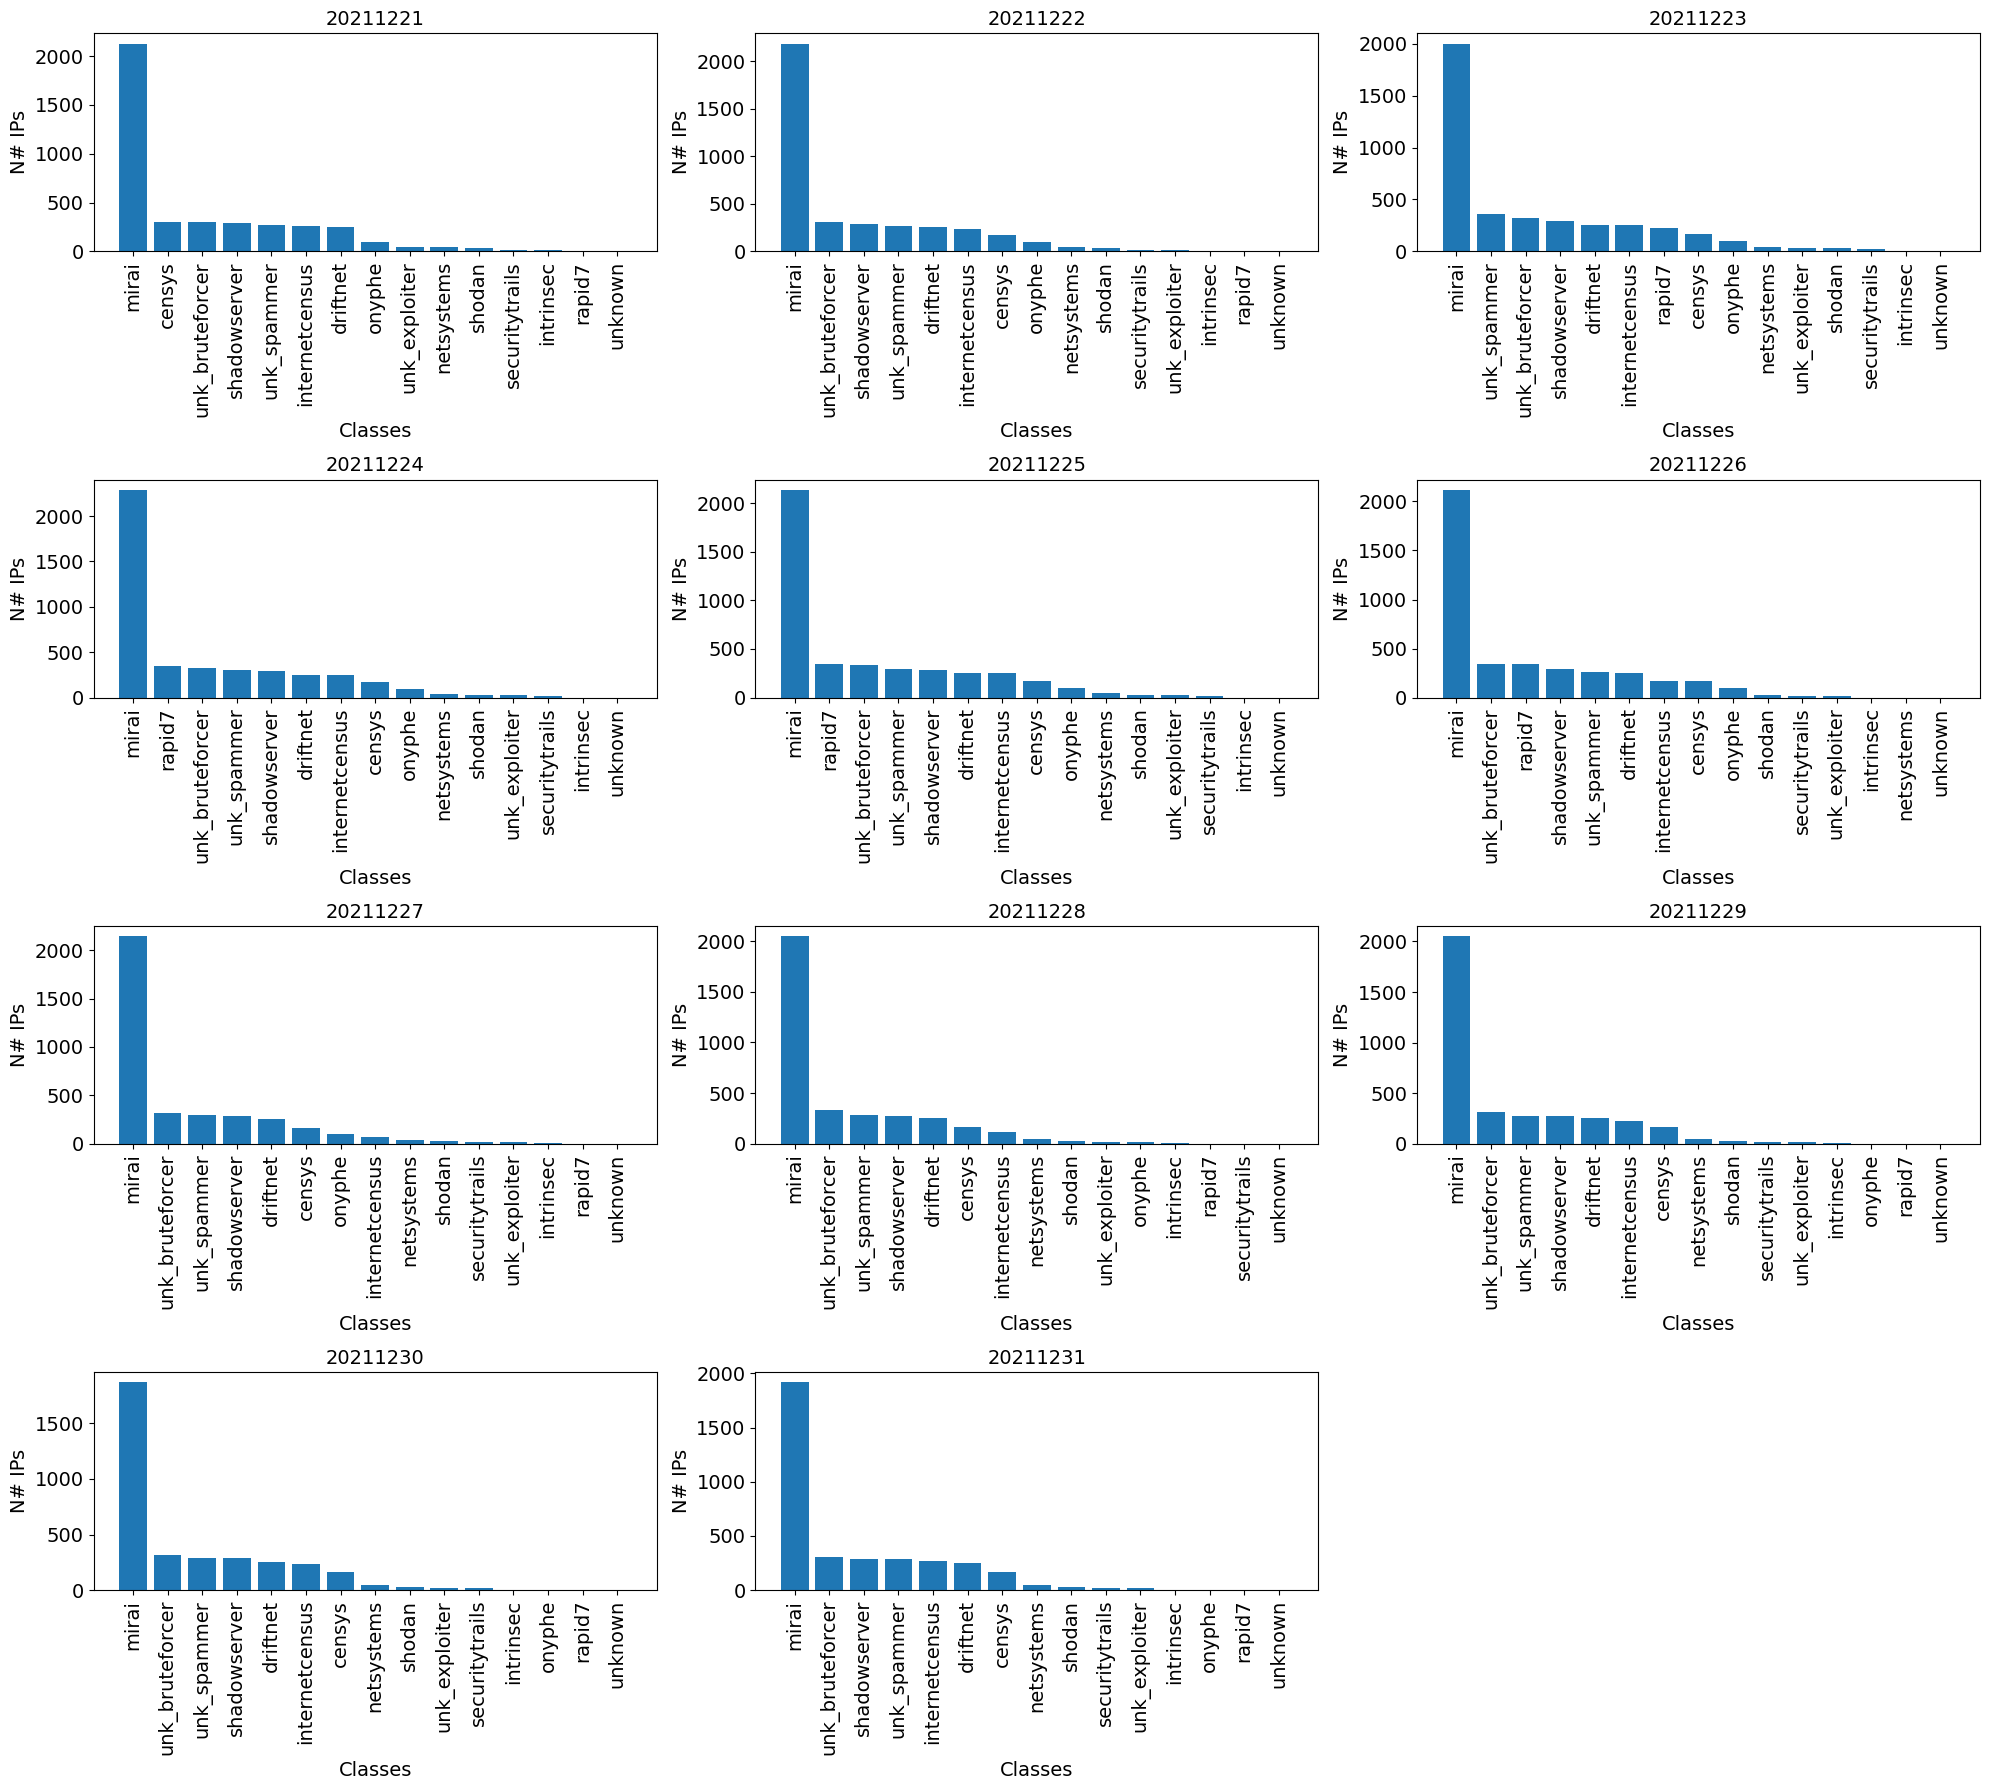

In [31]:
plt.figure(figsize=(20, 18))
for pidx, day in enumerate(days):
    plt.subplot(4, 3, pidx+1)
    df = pd.read_csv(f"out_loo/k3/train/gcn_{day}_loo.csv")
    plot_dist(df, day, probs_cols)

plt.tight_layout()
    
    

In [19]:
loader = np.load("/home/welton/DarkNet/stacking_data/vanilla/20211221/idarkvec-igcngru_features/0/data.npz")

In [21]:
loader["X_train"].shape

(3645, 30)